# Wordcloud/Konlpy 과제

2020.02.04 18기 문헌정보학과 김채형

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

## 1. Crawling

In [2]:
def CrawlingNaverNewsTitle(path, query, page_num):
    
    import requests
    from bs4 import BeautifulSoup
    
    all_titles = []
    
    for i in range(1, page_num*10, 10):
        url = 'https://search.naver.com/search.naver?&where=news&query=' + query + '&sm=tab_pge&sort=0&mynews=0&start=' + str(i)
        res = requests.get(url)
        soup = BeautifulSoup(res.content, 'html.parser')
        titles = soup.find_all(attrs={'class':'news_tit'})
        all_titles.append([t.text for t in titles])
        
        if i%100==1:
            print(i, '/', page_num*10, ':', url)
            
    result = sum(all_titles, [])
    
    return result

In [3]:
# 뉴스 기사 제목 크롤링
path = '/Users/kimchaehyeong/Downloads/chromedriver'
query = '아이유'
page_num = 400
result = CrawlingNaverNewsTitle(path, query, page_num)

1 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=1
101 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=101
201 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=201
301 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=301
401 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=401
501 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=501
601 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=601
701 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=701
801 / 4000 : https://search.naver.com/search.naver?&where=news&query=아이유&sm=tab_pge&sort=0&mynews=0&start=801
901 / 4000 : h

In [4]:
len(result)

4000

In [5]:
text = ' '.join(result)

## 2. Preprocessing

In [6]:
import re

In [7]:
# 신문사 이름 제거
p = re.compile('\[[가-힣A-z★]+\]')
text = re.sub(p, '', text)

In [8]:
# 특수문자 제거
text = re.sub('[\[\]\(\)!@#$%^&-_=+:;?\.★♥→\"‘’“”…·]', ' ', text)

In [9]:
# 결과 확인
text[:1000]

'아이유  이브자리 새 전속 모델 발탁 아이유  이브자리 새 얼굴 된다 아이유 설 인사  소처럼 에너지 넘치게 찾아가겠다  블랙야크  브랜드 앰버서더 아이유 설 인사 공개     만곡 내 귀에 캔디 아이유 없이 고막연인 될까  아이유  없는 스포티파이  韓 아티스트 모시기  총력  아이유   elebrity   빌보드           차트  주 연속  위 등극 케이팝 레이더 주간 차트 방탄소년단 또  위    아이유  셀러브리티 로 맹추    아이유도 참전한 침구업계 전지현 정해인과  파전 아이유・블랙핑크 꺾고      년 음원 순위  위는 바로  아이유  셀레브리티  뮤비 메이크업에 숨겨진 포인트는   뷰파인더  인기가요  아이유   셀러브리티 로  위  봄날 답장  기다리며   집 내는 아이유에게 쓴  밤편지  아이유  셀러브리티   공식 뮤비  천만 뷰 돌파  천만 만큼 사랑해  조용필부터 아이유까지 세대통합송 톱  아이유  봄의 여신 컴백 임박한 아이유에게 축하 받을  역대급  사건 생겼다   년전 노래가  아이유  내 손을 잡아  역주행 음원차트  위 아이유   월 wall  요일에 보면 더 좋은 지은이의 미모 완 벽 하기 때문  치열한 밥그릇 싸움  아이유 임영웅 없는 스포티파이 써보니   스포티파이 에  아이유  없다  애플뮤직  데자뷰 아이유  가온차트 주간 차트  관왕  산린이 맘속에 저장  아이유 이어 카이도 아웃도어 모델  음악중심  아이유  출연 없이  위 경서  여자 아이들 꺾었다   라디오쇼  박명수  아이유 막냇동생  음악 천재다      차트  아이유 웰컴백   월  주차 아차랭킹  위 아이유  출연 없이  셀러브리티 로  쇼  음악중심   위 아이유  주간 유튜브 뮤직차트  관왕 인기 곡 인기 뮤비 인기 아티스트  진짜 말도 안 된다  이제 곧 컴백하는 아이유  또 축하받을 일 생겼다  아이유 임영웅 빠진  스포티파이 써보니  기능은 多  가격은 ㅠㅠ  아이유  영화  브로커 에 송강호 강동원 배두나와 함께 출연  뮤직뱅크  아

## 3. Word cloud

In [10]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS as stopwords

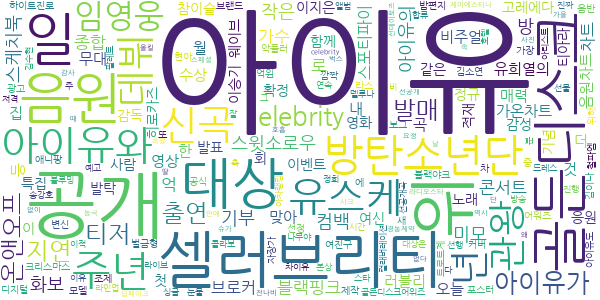

In [11]:
# Word cloud
wc = WordCloud(background_color='white', 
               collocations=False, 
               font_path = '/Library/Fonts/NanumGothic.ttf', 
               width = 600, height = 300)
wc.generate(text)
wc.to_image()

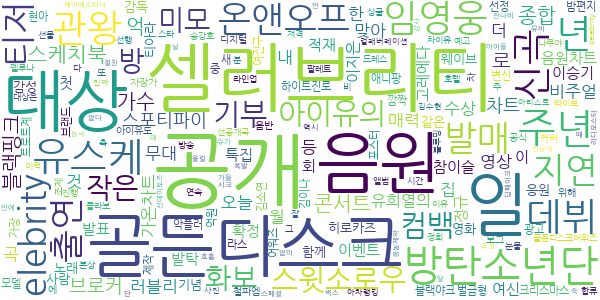

In [12]:
stopwords.update(['아이유', '아이유와', '아이유가', '위'])
wc.generate(text)
wc.to_image()